# maysics.models模块说明

models模块有两个函数

|名称|作用|
|---|---|
|linear_r|线性回归模型|
|logistic|逻辑斯特人口增长模型|

models模块有三个类

|名称|作用|
|---|---|
|ED|传染病模型|
|GM|灰色系统GM(1,1)|
|Leslie|莱斯利模型|

<br></br>
## 线性回归模型：linear_r
linear_r(x, y)
<br>```x```：一维或二维ndarray，自变量
<br>```y```：一维或二维ndarray，因变量

### 功能说明
利用最小二乘法进行线性回归
<br>x和y是用于回归的数据集，可以是一维或者二维数组
<br>函数返回一个元组，(系数矩阵, 均方误差mse)
<br>可以直接从maysics中调用

### DEMO 1-1：线性回归数据集并绘图

均方误差：1.552582977594145


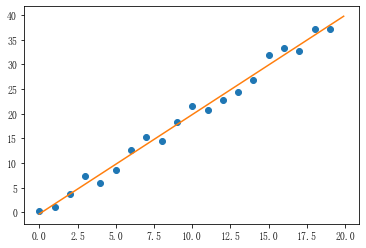

In [1]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(100)
x = np.arange(0, 20, 1)
y = 2 * x + 4 * np.random.rand(*x.shape) - 2    # 增加(-2, 2)的误差项

coef, mse = ms.models.linear_r(x, y)
print('均方误差：{}'.format(mse))

x_new = np.arange(0, 20, 0.1)
y_pre = coef[0] * x_new + coef[1]

plt.plot(x, y, 'o')
plt.plot(x_new, y_pre)

<br></br>
## 逻辑斯蒂人口增长模型：logistic
logistic(t, N0, r, K)
<br>t：时间
<br>N0：数或数组，现有人口数
<br>r：数类型，人口自然增长率
<br>K：数类型，环境资源允许的稳定人口数

### 原理
$$N_{t}=\frac{KN_{0}}{N_{0}+(K-N_{0})e^{-rt}}$$
<br>其中，$N_{t}$为$t$时刻的人口数， $N_{0}$为现有人口数，$r$为人口自然增长率，$K$为环境资源允许的稳定人口数

### DEMO 2-1： $N_{0}=100$，$r=8$%，$K=10^{6}$，绘制人口数随时间$t$的变化曲线

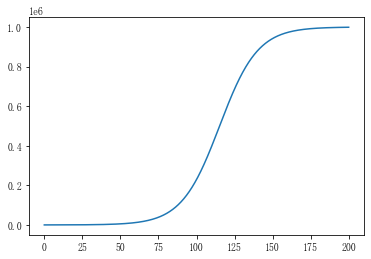

In [2]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0, 200, 0.1)
Nt = ms.models.logistic(t, 100, 0.08, 1e6)

plt.plot(t, Nt)

<br></br>
## 传染病模型：ED
ED(I0, K, beta, R=0, E=0)
<br>```I0```：数类型，初始感染者
<br>```K```：数类型，样本总数
<br>```beta```：数类型，感染率
<br>```R```：数类型，初始康复者(带有免疫力)或死者
<br>```E```：数类型，暴露者，染病但还不具有传染能力

### ED的方法
ED类有四个方法：```SI```、```SIR```、```SIRS```、```SEIR```
<br>分别可以实现四种传染病模型：SI、SIR、SIRS、SEIR
<br>SI(t)
<br>```t```：数或一维数组，需要预测的时间

SIR(gamma, t_span, method='RK45', t_eval=None)
<br>```gamma```：数类型，康复率
<br>```t_span```：元组类型，预测时间范围
<br>```method```：字符串类型，微分方程求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

SIRS(gamma, alpha, t_span, method='RK45', t_eval=None)
<br>```gamma```：数类型，康复率
<br>```alpha```：数类型，用于衡量康复者获得免疫的时间
<br>```t_span```：元组类型，求解的上下限
<br>```method```：字符串类型，求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

SEIR(gamma1, gamma2, alpha, t_span, method='RK45', t_eval=None)
<br>```gamma1```：数类型，潜伏期康复率
<br>```gamma2```：数类型，患者康复率
<br>```alpha```：数类型，用于衡量康复者获得免疫的时间
<br>```t_span```：元组类型，求解的上下限
<br>```method```：字符串类型，求解方法，可选择'RK45'、'RK23'、'DOP835'、'Radau'、'BDF'、'LSODA'
<br>```t_eval```：数组类型，每当t等于该数组中的值时，会生成一个数值解

### 原理
#### SI模型
SI模型有解析解：
<br>$I=K\frac{1-(K-I_{0})}{K+I_{0}+I_{0} e^{\beta Kt}}$
<br>$S=K-I$

#### SIR模型
SIR模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS$
<br>$\frac{dI}{dt}=\beta IS-\gamma I$
<br>$\frac{dR}{dt}=\gamma I$

#### SIRS模型
SIRS模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS+\alpha R$
<br>$\frac{dI}{dt}=\beta IS-\gamma I$
<br>$\frac{dR}{dt}=\gamma I-\alpha R$

#### SEIR模型
SEIR模型满足如下微分方程：
<br>$\frac{dS}{dt}=-\beta IS$
<br>$\frac{dE}{dt}=\beta IS-(\alpha+\gamma_{1})E$
<br>$\frac{dI}{dt}=\alpha E-\gamma_{2} I$
<br>$\frac{dR}{dt}=\gamma_{1}E+\gamma_{2}I$

### DEMO 3-1：利用SI模型预测病情并绘图，$I_{0}$为10，$K$为十万，$\beta$为0.1‰

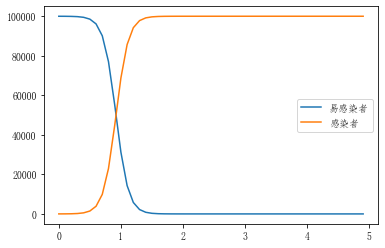

In [3]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 1e-4)
s, i = ed.SI(t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.legend()

### DEMO 3-2：利用SIR模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma=0.1$

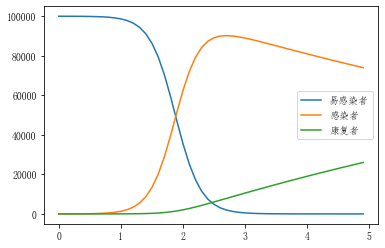

In [4]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 5e-5)
s, i, r = ed.SIR(0.1, (0, 5), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

### DEMO 3-3：利用SIRS模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma=0.1$，$\alpha=1$

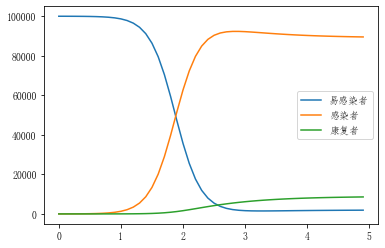

In [5]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.1)

ed = ED(10, 1e5, 5e-5)
s, i, r = ed.SIRS(0.1, 1, (0, 5), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

### DEMO 3-4：利用SEIR模型预测病情并绘图，$I_{0}=10$，$K=10^{5}$，$\beta=0.05$‰，$\gamma_{1}=0.3$，$\gamma_{2}=0.1$，$\alpha=1$

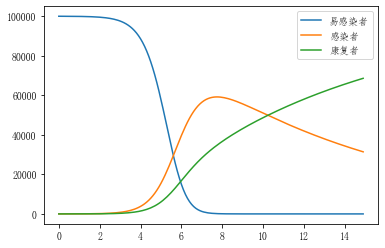

In [6]:
from maysics.models import ED
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, 15, 0.1)

ed = ED(10, 1e5, 5e-5)
s, e, i, r = ed.SEIR(0.3, 0.1, 1, (0, 15), t_eval=t)

plt.plot(t, s, label='易感染者')
plt.plot(t, i, label='感染者')
plt.plot(t, r, label='康复者')
plt.legend()

<br></br>
## 灰色系统模型GM(1, 1)：GM
GM()

### GM的方法
下设可调用方法```fit```
<br>fit(y, acc=1)
<br>y：一维数组
<br>acc：数类型，可选，调整级比的精度

### 调整级比时的精度
在调整级比时，模型会将数列循环平移acc个单位，直到$\lambda(k)$∈$(e^{-2/(n+1)}, e^{2/(n+2)})$
<br>其中，$\lambda(k)=\frac{x(0)(k-1)}{x(0)(k)}$，$k = 2, 3, ..., n$
<br>最后平移的长度可以通过调用C属性获取
### DEMO 4-1：acc参数调用和C属性获取

In [7]:
from maysics.models import GM

year = [-3, 2, 4, 8, 11]

GM.fit(year)
print('acc=1：{}'.format(GM.C))

GM.fit(year, acc=0.1)
print('acc=0.1：{}'.format(GM.C))

acc=1：16
acc=0.1：15.69999999999996


### DEMO 4-2：灾变预测：已知出现灾害的年份为(3, 8, 10, 14, 17)，求多少年后出现下一次灾害

In [8]:
from maysics.models import GM

year = [3, 8, 10, 14, 17]

GM.fit(year)

year_6 = GM.predict(6)
delta_year = year_6 - 17

print('第六次灾害年份：{}\n间隔时间：{}'.format(year_6, delta_year))

第六次灾害年份：21.122255207674726
间隔时间：4.122255207674726


因此第六次灾害年份约为21，约4年后出现下一次灾害

<br></br>
## 莱斯利模型：Leslie
Leslie(N0, r, s, age_range=1)
<br>```N0```：一维数组，各年龄层初始个体数目
<br>```r```：一维数组，各年龄层的生殖率
<br>```s```：一维数组，各年龄层到下一个年龄层的存活率
<br>```age_range```：整型，年龄段的跨度

### Leslie的方法
Leslie类下设一个可调用方法```predict```
<br>predict(t)
<br>```t```：数或一维数组，需要预测的时间

### 原理
$N_{t}=N_{0}M^{t}$
<br>$N_{t}$是t时刻的个体数行矩阵，$N_{0}$是各年龄层初始个体数目的行矩阵，要求各年龄层跨度一致，t须是年龄层跨度的整数倍
<br>$M$是莱斯利矩阵
<br>$$
M=\left( \begin{array}{cc} f_{1} & f_{2} & \cdots & f_{m-1} & f_{m} \\
s_{1} & 0 & \cdots & 0 & 0 \\
0 & s_{2} & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & s_{m-1} & 0 \end{array} \right)
$$
<br>$f_{i}$表示第i个年龄段的生殖率，$s_{i}$表示第i个年龄段的存活率

### DEMO 5-1：预测种群在20年后的年龄结构

In [9]:
from maysics.models import Leslie
import numpy as np

N0 = [10, 10, 10, 10, 10]
r = [0, 0.3, 0.8, 0.5, 0.1]
s = [1, 0.8, 0.5, 0.3]

leslie = Leslie(N0, r, s, 5)
leslie.predict(20)

array([12.9 , 13.18, 13.62,  7.03,  1.34])